In [3]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#LIME
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer



In [4]:
data=pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# sns.heatmap(data.isnull());
# pp.ProfileReport(data)

In [8]:
# Model Preparation
y = data["target"]
X = data.drop('target',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [10]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [11]:
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Models

In [14]:
#Logstic Regression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [15]:
#Random Forest Classfier
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



In [16]:
#K-neighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
    
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [17]:
#Model Comparision
model_ev = pd.DataFrame({'Models': ['Logistic Regression','Random Forest','K-Nearest Neighbour'], 
                         'Accuracy': [lr_acc_score*100,rf_acc_score*100,knn_acc_score*100]})

In [18]:
model_ev

,Models,Accuracy
0,Logistic Regression,86.341463
1,Random Forest,93.658537
2,K-Nearest Neighbour,87.804878


([<matplotlib.axis.XTick at 0x1a2406c5d60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

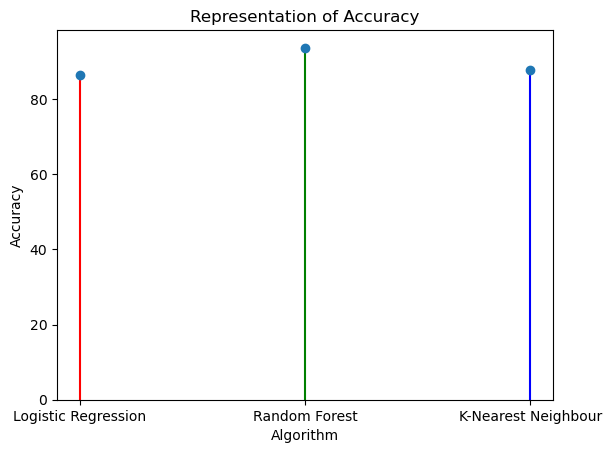

In [19]:
fig, axes = plt.subplots()
colors = ['red','green','blue']
axes.vlines(model_ev['Models'], ymin=0,
            ymax=model_ev['Accuracy'], colors=colors)
axes.plot(model_ev['Models'], model_ev['Accuracy'], "o")
axes.set_ylim(0)
# formatting and details
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Representation of Accuracy')
plt.xticks(model_ev['Models'])

In [20]:
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train)
# make predictions for test data
xgb_predictions = xgb.predict(X_test)

In [21]:
tgt = 0
print('Target:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test[tgt], 
                     feature_names=list(X.columns))

Target: 1
Predicted: 1


In [22]:
tgt = 1
print('Target:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test[tgt], 
                     feature_names=list(X.columns))

Target: 0
Predicted: 0
